# <center> Looking at Cross correlation between Counts, Temp and Humidity <center>

In [1]:
#Load data manipulation packages
library(tidyverse)
library(ggplot2)

#Load time series library
library(forecast)
library(tseries)

#Library to create dummy variables
library(caret)
library(fastDummies)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1.9000     ✔ purrr   0.2.5     
✔ tibble  1.4.2          ✔ dplyr   0.7.5     
✔ tidyr   0.8.1          ✔ stringr 1.3.0     
✔ readr   1.1.1          ✔ forcats 0.3.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [2]:
#Read data in
dat = read.csv('bike_sharing_hourly.csv')

In [3]:
#Convert date column from type string to type date
dat[,'dteday'] = as.Date(dat[,'dteday'])

In [4]:
#Create dummy variables for time of year and seasonality
dat_with_dummies = dummy_cols(dat, select_columns = c('season', 'weekday', 'weathersit'), 
           remove_first_dummy = TRUE)

In [5]:
#Create train and test splits
train = dat_with_dummies[dat[,'dteday'] >= '2011-01-01' & dat[,'dteday'] < '2011-12-31', ]
test = dat_with_dummies[dat[,'dteday'] >= '2012-01-01', ]

In [6]:
str(train)

'data.frame':	8621 obs. of  29 variables:
 $ instant     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday      : Date, format: "2011-01-01" "2011-01-01" ...
 $ season      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hr          : int  0 1 2 3 4 5 6 7 8 9 ...
 $ holiday     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday     : int  6 6 6 6 6 6 6 6 6 6 ...
 $ workingday  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weathersit  : int  1 1 1 1 1 2 1 1 1 1 ...
 $ temp        : num  0.24 0.22 0.22 0.24 0.24 0.24 0.22 0.2 0.24 0.32 ...
 $ atemp       : num  0.288 0.273 0.273 0.288 0.288 ...
 $ hum         : num  0.81 0.8 0.8 0.75 0.75 0.75 0.8 0.86 0.75 0.76 ...
 $ windspeed   : num  0 0 0 0 0 0.0896 0 0 0 0 ...
 $ casual      : int  3 8 5 3 0 0 2 1 1 8 ...
 $ registered  : int  13 32 27 10 1 1 0 2 7 6 ...
 $ cnt         : int  16 40 32 13 1 1 2 3 8 14 ...
 $ season_2    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ season_3    : int  0 0 0 0 0 0 

## Prewhitening Temperature, Windspeed and Humidity

We are interested in studying the effects of temperature, wind and humidity on bike ride counts. These variables could have a lag effect on ride count. We perform pre-whitening analysis to investigate this. 

### 1. Temperature

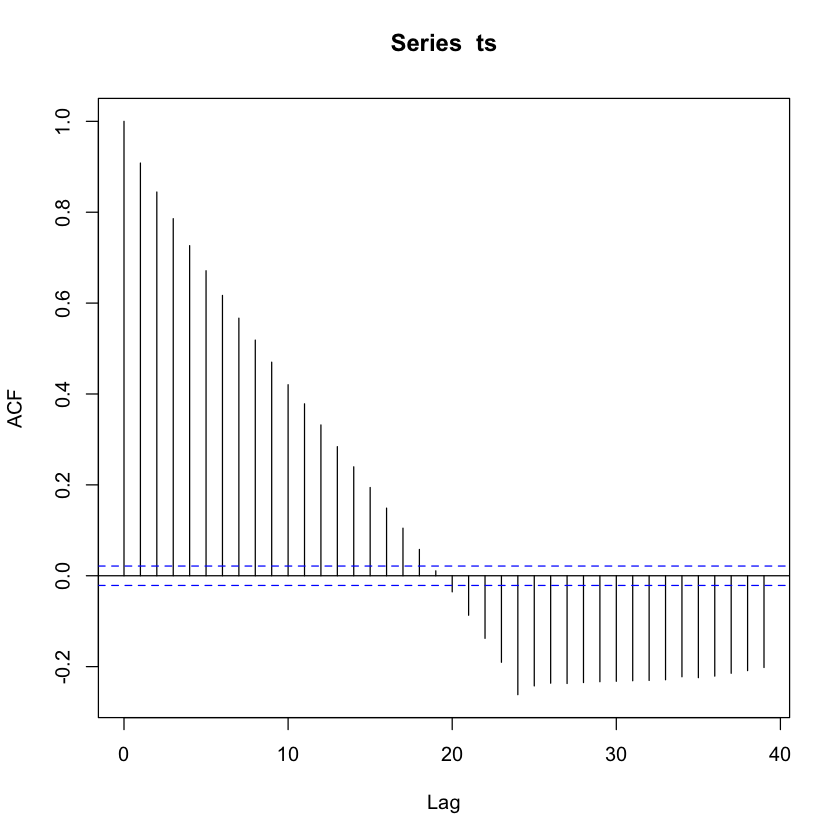

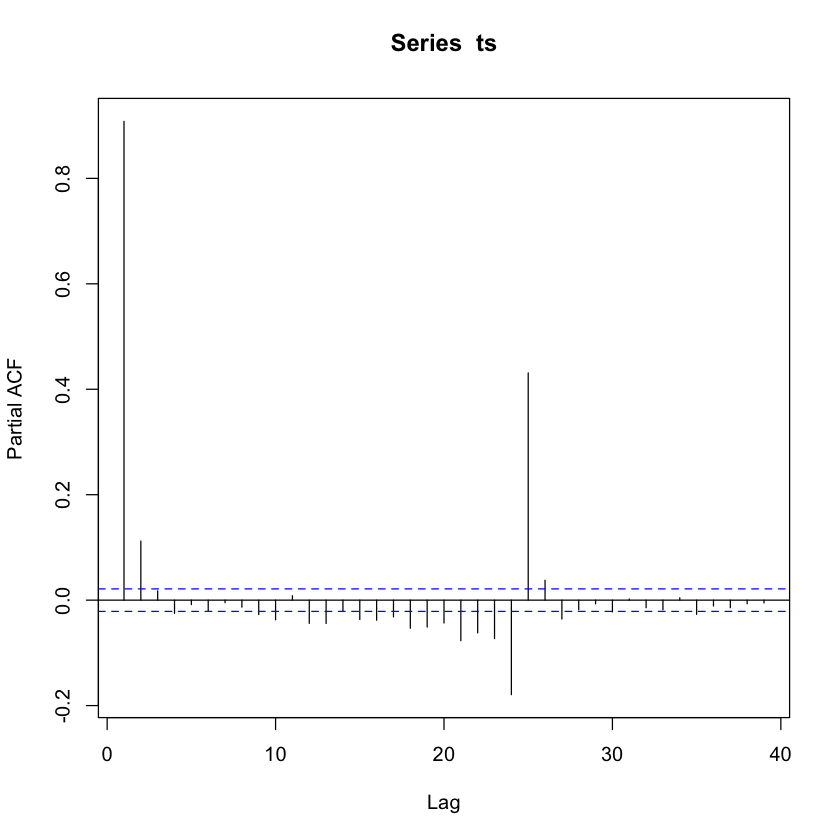

In [8]:
#Check correlation structure of temperature
ts = diff(train$atemp, lag=24, differences = 1) %>% diff(lag=24*7, differences = 1)
acf(ts)
pacf(ts)

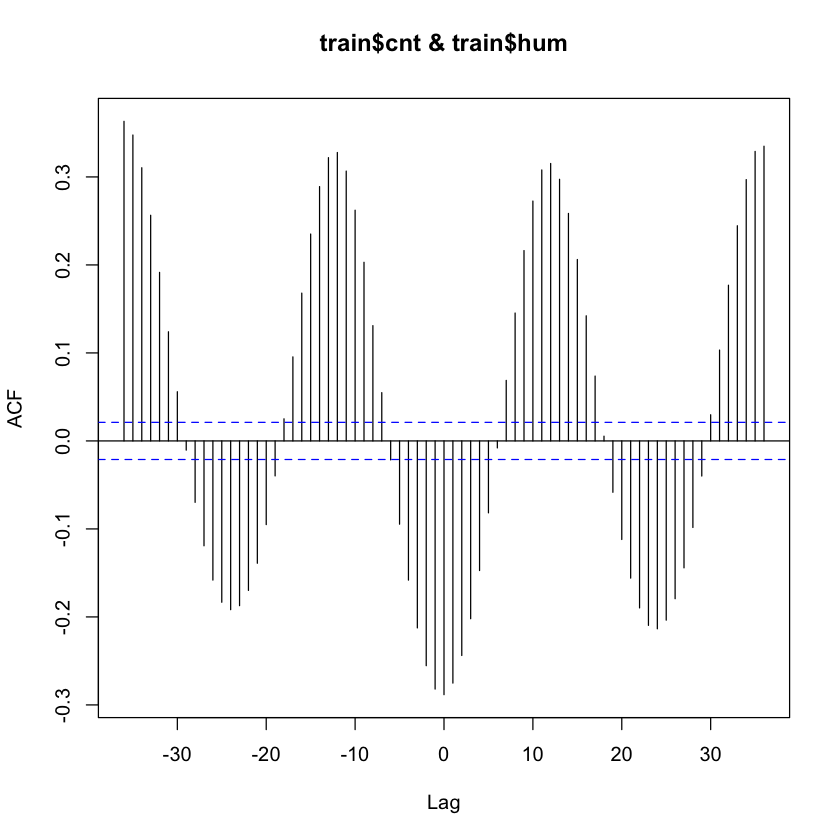

In [28]:
ccf(train$cnt, train$hum)